
# Project: Investigate a Dataset (TMDb movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



For this project I will be working with a movie data set that is collected by [TMDb](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv). This contains approximately 5000 movies from different genres [1]. The data set contains 21 columns and 10866 rows. I will be investing the following questions
1. Which movies are popular?
2. What properties are associated with movies that are popular?
3. Do popular movies generate more revenue?

But first we will have to load the data, clean it and then explore it

In [63]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
%matplotlib inline
import matplotlib.pyplot as plt



<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [64]:
# Loading the TMDb data
movies = pd.read_csv('tmdb-movies.csv')

In [65]:
# A snapshot of the dataframe
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [66]:
#Summary of all the info contained in the table
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

>Most of the data types seem to be correct but for analyses sake we will have to change 'id' data type to a string

In [67]:
# Checking if there are any duplicates
movies.duplicated().sum()

1

In [68]:
#Checking if there are any missing values
movies.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

>The homepage and tagline column seem to contain a lot of missing values and will have to be dropped

### Data Cleaning 
The following modifications were done on the data
1. Changed the data type of column 'id'
2. Dropped the duplicate row 
3. Dropped columns which contained a lot of missing values and are irrelavant for this analysis

In [69]:
# Change the data tpe of 'id' and confirm if it changed
movies['id'] = movies.id.astype(str)
movies['id'].dtype

dtype('O')

In [70]:
# drop the duplicate row
movies.drop_duplicates(inplace=True)

In [71]:
# Drop columns with missing values
movies.drop(['homepage', 'tagline'], axis=1, inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Which movies are more popular?

To explore this question we will look at movies that got the highest popularity score.  We will the draw a histogram to to show the top 10 most popular movies. But first we will need to sort the data starting from the top going down.

In [72]:
# extracting data of top performing movies and worst performing movies
movies_most_popular = movies.sort_values('popularity',ascending=False).head(10)

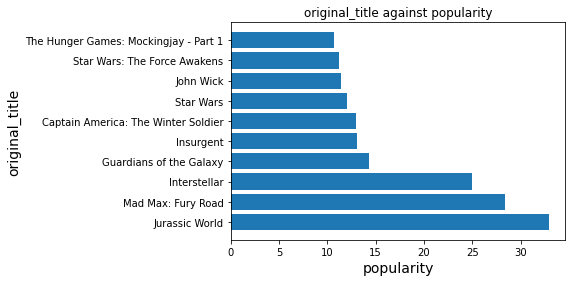

In [73]:
# A def function we will use to draw a horizontal bar graph
def bar_plot(x,y):
    barWidth = 0.8
    plt.barh(movies_most_popular[x],movies_most_popular[y], height=barWidth)
    plt.ylabel(x,fontsize=14)
    plt.xlabel(y,fontsize=14)
    plt.title(f'{x} against {y}')
    plt.show()

bar_plot('original_title','popularity')

The three leading movies are jurassic world, Mad Max and interstellar, They significantly differ from the other 7 movies when it comes to popularity

### Research Question 2: What kind of properties are associated with movies that are more popular?


To explore this question we will only focus on movies which performed above average in terms of popularity. We will first look at distribution of each individual column. From thereon we will find the correlation between between all the variables


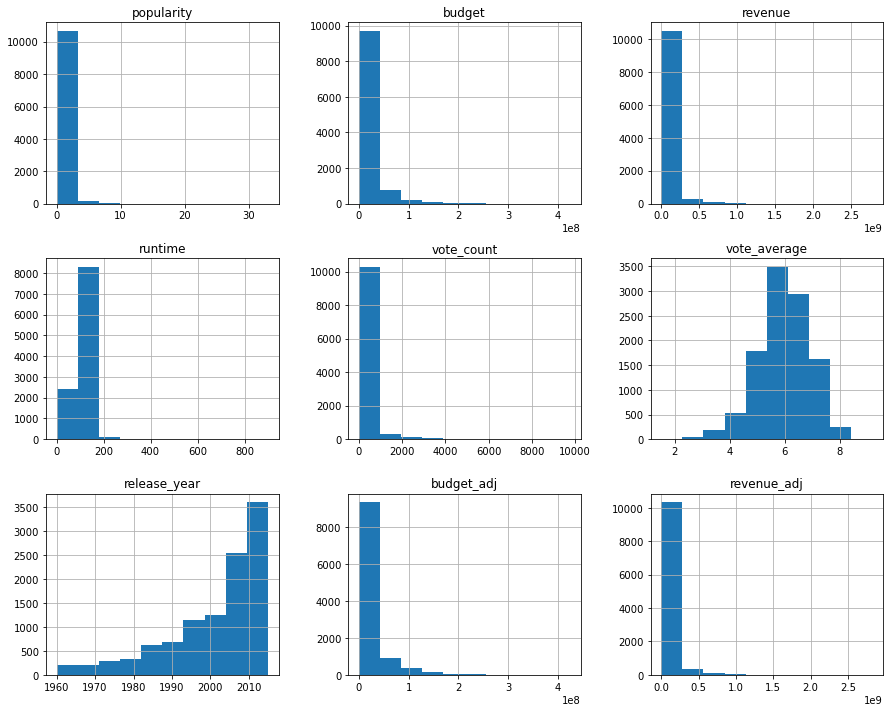

In [74]:
# A histogram plot of all the variables
movies.hist(figsize =(15,12), );

Most of the variables i.e popularity, budget, revenue, runtime and revenue are  skewed to the right. only 

In [75]:
#calulate the mean of popularity
movies['popularity'].mean()

0.6464455549010583

In [76]:
# Select movies that are above average in terms of popularity
movies_above_average = movies.query('popularity >= 0.646')

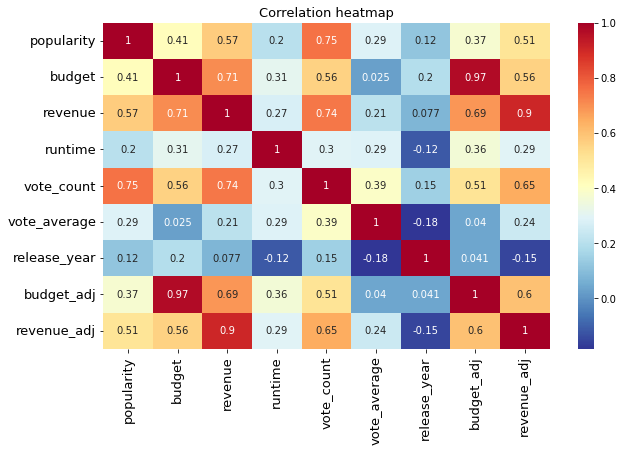

In [77]:
# correlation heatmap
plt.figure(figsize = (10,6))
plot = sns.heatmap(movies_above_average.corr(method="pearson"), cmap = plt.cm.RdYlBu_r, annot = True, vmax = 1)
plot.set_xticklabels(plot.get_xmajorticklabels(),fontsize = 13)
plot.set_yticklabels(plot.get_ymajorticklabels(),fontsize = 13)
plot.set_title('Correlation heatmap', fontsize = 13)
plt.show()

From the correlation heatmap we can observe the following
Popularity has average correlation of 0.57 with revenue and a high correlation of 0.75 with vote count

### Resesarch question 3: Do popular movies generate more revenue ?


We will first start by filtering out all movies with 0 revenue as this might mean that this info is missing.

In [78]:
movies_revenue = movies.query('revenue> 0')

In [79]:
# Check whether this worked
movies_revenue.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,4849.000000,4.849000e+03,4.849000e+03,4849.000000,4849.000000,4849.000000,4849.000000,4.849000e+03,4.849000e+03
mean,1.045202,2.956961e+07,8.923886e+07,107.968035,436.283151,6.149000,2000.919777,3.516208e+07,1.151009e+08
std,1.356752,4.051761e+07,1.620801e+08,21.113779,806.485754,0.798707,11.569650,4.376117e+07,1.988557e+08
min,0.001117,0.000000e+00,2.000000e+00,15.000000,10.000000,2.100000,1960.000000,0.000000e+00,2.370705e+00
25%,0.387740,1.700000e+06,7.732325e+06,95.000000,46.000000,5.600000,1994.000000,2.329409e+06,1.046585e+07
50%,0.680581,1.500000e+07,3.185308e+07,104.000000,147.000000,6.200000,2004.000000,2.032801e+07,4.395666e+07
75%,1.210502,4.000000e+07,9.996575e+07,117.000000,435.000000,6.700000,2010.000000,4.973516e+07,1.316482e+08
max,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


Here we can see that the revenue min = 2.000000e+00. This means that all the rows with no revenue have been filtered out and we can now continue

From the previous exploration in question 2 we noticed that most of the variables are skewed to the left. which means we have some outliers. So now we will try to remove these outliers before we can plot our graph

In [80]:
# Find the outliers first using IQR (Inter-Quartile Range Method)
Q1 = movies_revenue['popularity'].quantile(0.25)
Q3 = movies_revenue['popularity'].quantile(0.75)
IQR = Q3 - Q1

In [81]:
# Now we check what is the lower and upper bound for Revenue (the 25th and 75th percentile values)

# In this case lower bound is -0.846403 (meaning anything below -0.846403 is an outlier )
# Upper bount is 2.444645 (meaning anything above 2.444645 is an outlier)


print(Q1 - 1.5 * IQR)         # values  below this value are outliers
print(Q3 + 1.5 * IQR)         # values above this value are also outliers

-0.846403
2.444645


In [82]:
# Drop the outliers
df = movies_revenue.query('-0.846403 < popularity <= 2.44465')

C:\Users\Monica\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


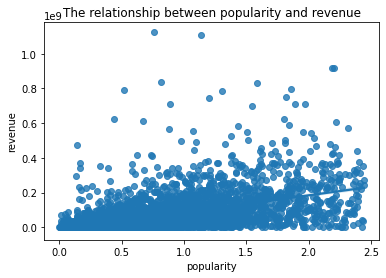

In [83]:
# a regression plot Showing the relationship between popularity and revenue
sns.regplot(df.popularity, df.revenue).set(title= 'The relationship between popularity and revenue');

In [84]:
# finding the correlation between popularity and revenue after removing outliers [2]
dependant= df['popularity']
independant= df['revenue']

corr_matrix = np.corrcoef(dependant, independant)
corr = corr_matrix[0,1]
R_sq = corr**2

print(R_sq)


0.2791116044803771


There seems to be a positive correlation between popularity and revenue. But with the outliers removed the correlation between popularity and revenue  dropped.

<a id='conclusions'></a>
## Conclusions


Question 1
>  Jurassic world, Mad Max and interstellar are the most popular movies.With the Hungergames:Mockingjay- part 1 being at the bottom of the top 10 chart.They significantly differed in terms of performance when compared to the other 7 movies in the top 10.

Question 2
> Popular movies got more vote counts. Movies that are popular than others are likely to generate more Revenue.

Question 3
> Given the correlation that was found between popularity and revenue in question 2, we could have easily concluded that the more popular movies generate more revenue. But further analysis done in question 3 shows that as much as there is positive correlation, that is, an inrease in popularity means the movie generates more revenue. We can't conclude that all popular movies generate more revenue as they become more popular. 

## Limitations
Some of the data was missing and i therefore had to filter them out and this means my sample space was decreased

## References

1.  https://www.kaggle.com/tmdb/tmdb-movie-metadata.
2. https://www.askpython.com/python/coefficient-of-determination